### Assessed Task #2

In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

#from collections import Counter

import warnings
warnings.filterwarnings('ignore')

**Task1**: Authentication

In [2]:
# Your credentials go here ...

consumer_key = 'TsBOnrwydStaWmvUeShzJ90iS'
consumer_key_secret = 'FkkmXlmwTSjaf8pds7rz3tvOpehRVPpB8lKlWBQzBp4fsDbKY1'
access_token = '2576751307-N7lUuCWkpY7ZcNDJZlRzDB6QAnfEjN9tgWhhA9B'
access_token_secret = 'L6nOSOKuJ2GbSDj8nTfGb5yCQVxGKlZrIFzzdtyacwfkV'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

**Task 1**
Collect 400 tweets from two different Twitter users (Australian politicians), 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.


#### Julian Hill MP (@JulianHillMP) 


In [3]:
max_tweets = 200
screen_name = '@JulianHillMP'

tweets_JH = api.user_timeline(screen_name = screen_name,
                             tweet_mode = 'extended',
                             count = max_tweets)

In [4]:
list_of_dicts_JH = []
for tweet in tweets_JH:
    list_of_dicts_JH.append(tweet._json)
#print(list_of_dicts_JH)

with open('Files/JulianHillMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_JH , indent = 4))

#### Scott Morrison (@ScottMorrisonMP) 

In [5]:
max_tweets = 200
screen_name = '@ScottMorrisonMP'

tweets_SM = api.user_timeline(screen_name = screen_name,
                           tweet_mode = 'extended',
                           count = max_tweets)

In [6]:
list_of_dicts_SM = []
for tweet in tweets_SM:
    list_of_dicts_SM.append(tweet._json)
#print(list_of_dicts_SM)

with open('Files/ScottMorrisonMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_SM , indent = 4))

In [7]:
#print(list_of_dicts_JH)

In [8]:
#JulianHillMP
list1 = []
with open('Files/JulianHillMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_JH = json.load(file)
        for dict in list_of_dicts_JH:
             list1.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })
#print(list[0])

In [9]:
#JulianHillMP
df_JH = pd.DataFrame(list1 , columns = ['user','full_text', 'posting_time'])
df_JH

,user,full_text,posting_time
0,Julian Hill MP,RT @SenKatyG: The Morrison Government wants us...,Fri Oct 15 06:19:32 +0000 2021
1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021
2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021
3,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021
4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,Thu Oct 14 21:54:53 +0000 2021
...,...,...,...
194,Julian Hill MP,"RT @MikeCarlton01: So good, worth retweeting. ...",Sat Aug 28 10:13:38 +0000 2021
195,Julian Hill MP,⛔️⚠️ “The premiers have had enough of Scott Mo...,Sat Aug 28 04:47:15 +0000 2021
196,Julian Hill MP,Totally forgot to send a tweet today.\n#tweetl...,Fri Aug 27 10:34:45 +0000 2021
197,Julian Hill MP,Experiment: can you tweet an Insta? 🤔 🤷‍♂️ \nL...,Thu Aug 26 08:22:07 +0000 2021


In [10]:
df_JH['posting_time'] = pd.to_datetime(df_JH['posting_time'])
df_JH['hour'] = df_JH['posting_time'].dt.hour

__ScottMorrisonMP__

In [11]:
#print(list_of_dicts_SM)

In [12]:
#ScottMorrisonMP
list2 = []
with open('Files/ScottMorrisonMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_SM = json.load(file)
        for dict in list_of_dicts_SM:
            list2.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })

In [13]:
#ScottMorrisonMP
df_SM = pd.DataFrame(list2 , columns = ['user','full_text', 'posting_time'])
df_SM

,user,full_text,posting_time
0,Scott Morrison,Warm congrats Japanese PM Kishida. Great to ch...,Tue Oct 05 05:11:00 +0000 2021
1,Scott Morrison,Australia and India are great friends. Our Com...,Thu Sep 30 07:18:22 +0000 2021
2,Scott Morrison,Great to meet with Australian Indian media tod...,Thu Sep 30 07:18:21 +0000 2021
3,Scott Morrison,Great to meet my good friend Japanese PM @suga...,Sat Sep 25 10:00:31 +0000 2021
4,Scott Morrison,Excellent discussions at our first in-person Q...,Fri Sep 24 22:58:33 +0000 2021
...,...,...,...
195,Scott Morrison,Thank you once again to the people of Victoria...,Wed Feb 03 22:13:53 +0000 2021
196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,Mon Feb 01 21:10:35 +0000 2021
197,Scott Morrison,The coming days will be difficult for many Wes...,Sun Jan 31 05:52:40 +0000 2021
198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,Wed Jan 27 10:09:34 +0000 2021


In [14]:
df_SM['posting_time'] = pd.to_datetime(df_SM['posting_time'])
df_SM['hour'] = df_SM['posting_time'].dt.hour

**Merging df_JH and df_SM tables into one df**

In [15]:
df = pd.concat([df_JH,df_SM], axis=0).reset_index()
df

,index,user,full_text,posting_time,hour
0,0,Julian Hill MP,RT @SenKatyG: The Morrison Government wants us...,2021-10-15 06:19:32+00:00,6
1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23
2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23
3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21
4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21
...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10


**Task 2** Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

Text(0.5, 0, 'Time')

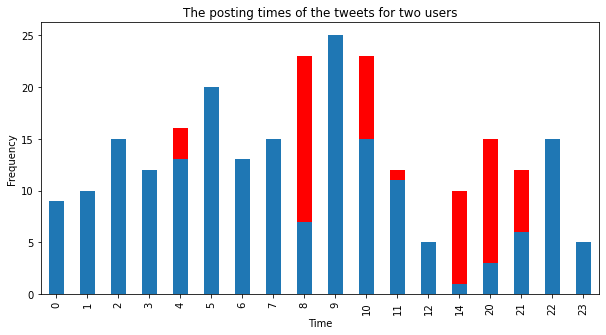

In [16]:
ax1 = df_JH['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5), color = 'red')
ax2 = df_SM['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5))
ax1.set_title('The posting times of the tweets for two users')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Time')

**Task 3** Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.

In [17]:
df

,index,user,full_text,posting_time,hour
0,0,Julian Hill MP,RT @SenKatyG: The Morrison Government wants us...,2021-10-15 06:19:32+00:00,6
1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23
2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23
3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21
4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21
...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10


Remove all retweets ('RT') from the DataFrame and display the resulting DataFrame.

In [18]:
df = df[~df['full_text'].str.startswith('RT')]
df

,index,user,full_text,posting_time,hour
1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23
2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23
3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21
4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21
5,5,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,2021-10-14 21:05:16+00:00,21
...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10


In [19]:
df['text_without_links'] = df['full_text'].str.replace('http\S+|www.\S+', '', case = False)
df

,index,user,full_text,posting_time,hour,text_without_links
1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23,"Ummm, Matty, you do know how that story ends r..."
2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23,"@mattjcan Ummm, you do know how that story end..."
3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21,How many tools can you count in this photo?
4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21,Cosplay Canavan loves the dress-up box!\n\nAn ...
5,5,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,2021-10-14 21:05:16+00:00,21,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...
...,...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22,Thank you once again to the people of Victoria...
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...


In [20]:
df['text_without_links'][1]

'Ummm, Matty, you do know how that story ends right? \n#auspol '

In [21]:
df['tweet_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df

,index,user,full_text,posting_time,hour,text_without_links,tweet_links
1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI]
2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23,"@mattjcan Ummm, you do know how that story end...",[]
3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG]
4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21,Cosplay Canavan loves the dress-up box!\n\nAn ...,[https://t.co/YTo2pXhLur]
5,5,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,2021-10-14 21:05:16+00:00,21,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,"[https://t.co/VhRCoGAKkh, https://t.co/q1Gcg0O..."
...,...,...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22,Thank you once again to the people of Victoria...,[]
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...,[]
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...,[]
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...,[https://t.co/efSJnhATBc]


In [22]:
tweet_links = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
tweet_links

1                              [https://t.co/WG6qxHRRhI]
2                                                     []
3                              [https://t.co/Bk7cMCoWsG]
4                              [https://t.co/YTo2pXhLur]
5      [https://t.co/VhRCoGAKkh, https://t.co/q1Gcg0O...
                             ...                        
394                                                   []
395                                                   []
396                                                   []
397                            [https://t.co/efSJnhATBc]
398                            [https://t.co/53trQwNfP5]
Name: full_text, Length: 305, dtype: object

In [23]:
df['include_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))
df = df.reset_index()                                 
df.head()

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links
0,1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True
1,2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23,"@mattjcan Ummm, you do know how that story end...",[],False
2,3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True
3,4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21,Cosplay Canavan loves the dress-up box!\n\nAn ...,[https://t.co/YTo2pXhLur],True
4,5,5,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,2021-10-14 21:05:16+00:00,21,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,"[https://t.co/VhRCoGAKkh, https://t.co/q1Gcg0O...",True


In [24]:
print(df['text_without_links'][0])
print(df['text_without_links'][1])

Ummm, Matty, you do know how that story ends right? 
#auspol 
@mattjcan Ummm, you do know how that story ends right? 
#auspol


In [25]:
#Create new df to calculate proportion of tweet including pictures or links
media_prob = df.groupby(['user','include_links']).size().reset_index(name ='count')
media_prob['total'] = media_prob.groupby(['user'])['count'].transform('sum')
media_prob = media_prob.sort_values(by=['total'], ascending=False)
media_prob

,user,include_links,count,total
2,Scott Morrison,False,56,166
3,Scott Morrison,True,110,166
0,Julian Hill MP,False,47,139
1,Julian Hill MP,True,92,139


In [26]:
media_prob['percentage'] = [i / j * 100 for i,j in zip(media_prob['count'], media_prob['total'])]
media_prob

,user,include_links,count,total,percentage
2,Scott Morrison,False,56,166,33.73494
3,Scott Morrison,True,110,166,66.26506
0,Julian Hill MP,False,47,139,33.81295
1,Julian Hill MP,True,92,139,66.18705


In [27]:
cols = ['user', 'percentage']
media_prob_true = media_prob[media_prob['include_links'] == True]
media_prob_true = media_prob_true[cols]
media_prob_true

,user,percentage
3,Scott Morrison,66.26506
1,Julian Hill MP,66.18705


Text(0.5, 0, 'User')

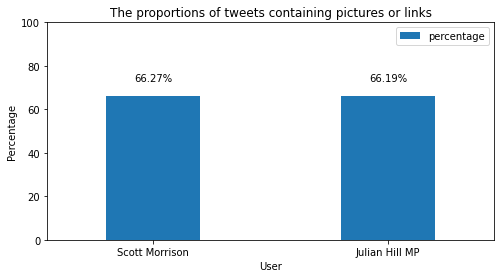

In [28]:
ax = media_prob_true.plot(kind='bar', x='user', y= 'percentage', figsize=(8,4), width=0.4, rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height.round(2)}%', (x + width/2, y + height*1.1), ha='center')
ax.set_ylim(0, 100)
ax.set_title('The proportions of tweets containing pictures or links')
ax.set_ylabel('Percentage')
ax.set_xlabel('User')

**Task 4** Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.

In [29]:
hashtag = re.compile("#(\w+)")
df['text_without_hashtags'] = df['text_without_links'].apply(lambda x: hashtag.sub(r'', x))

In [30]:
df['hashtags'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_count'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df.head()

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links,text_without_hashtags,hashtags,hashtags_count
0,1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True,"Ummm, Matty, you do know how that story ends r...",[auspol],1
1,2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23,"@mattjcan Ummm, you do know how that story end...",[],False,"@mattjcan Ummm, you do know how that story end...",[auspol],1
2,3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True,How many tools can you count in this photo?,[],0
3,4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21,Cosplay Canavan loves the dress-up box!\n\nAn ...,[https://t.co/YTo2pXhLur],True,Cosplay Canavan loves the dress-up box!\n\nAn ...,[auspol],1
4,5,5,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,2021-10-14 21:05:16+00:00,21,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,"[https://t.co/VhRCoGAKkh, https://t.co/q1Gcg0O...",True,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n \n \n,"[DoingaMorrison, auspol]",2


In [31]:
cols = ['user', 'hashtags_count']
ha = df[cols]
ha

,user,hashtags_count
0,Julian Hill MP,1
1,Julian Hill MP,1
2,Julian Hill MP,0
3,Julian Hill MP,1
4,Julian Hill MP,2
...,...,...
300,Scott Morrison,0
301,Scott Morrison,1
302,Scott Morrison,0
303,Scott Morrison,0


In [32]:
cols = ['user', 'hashtags_count']
hashtags1 = df[cols]
hashtags2 = df[cols]
hashtags1 = hashtags1[hashtags1['user'] == 'Julian Hill MP']
hashtags2 = hashtags2[hashtags2['user'] == 'Scott Morrison']
hashtags1.rename(columns={"hashtags_count": "JulianHill"}, inplace =True)
hashtags2.rename(columns={"hashtags_count": "ScottMorrison"}, inplace =True)
hashtags1


,user,JulianHill
0,Julian Hill MP,1
1,Julian Hill MP,1
2,Julian Hill MP,0
3,Julian Hill MP,1
4,Julian Hill MP,2
...,...,...
134,Julian Hill MP,1
135,Julian Hill MP,0
136,Julian Hill MP,2
137,Julian Hill MP,2


In [33]:
hashtags2

,user,ScottMorrison
139,Scott Morrison,0
140,Scott Morrison,0
141,Scott Morrison,0
142,Scott Morrison,0
143,Scott Morrison,0
...,...,...
300,Scott Morrison,0
301,Scott Morrison,1
302,Scott Morrison,0
303,Scott Morrison,0


In [34]:
ht_merged= pd.concat([hashtags1['JulianHill'], hashtags2['ScottMorrison']], axis=1, keys=None)
ht_merged

,JulianHill,ScottMorrison
0,1.0,NaN
1,1.0,NaN
2,0.0,NaN
3,1.0,NaN
4,2.0,NaN
...,...,...
300,NaN,0.0
301,NaN,1.0
302,NaN,0.0
303,NaN,0.0


In [35]:
ht_merged = pd.merge(hashtags1, hashtags2)
#ht_merged['JulianHill'] = ht_merged['JulianHill'].fillna(0).astype(int)
#ht_merged['ScottMorrison'] = ht_merged['ScottMorrison'].fillna(0).astype(int)
#ht_merged.set_index('hashtags_count', inplace=True)
ht_merged

,user,JulianHill,ScottMorrison


In [36]:
hashtags_SM1 = df[cols]
hashtags_SM1 = hashtags_SM1[hashtags_SM1['user'] == 'Scott Morrison']
hashtags_SM1

,user,hashtags_count
139,Scott Morrison,0
140,Scott Morrison,0
141,Scott Morrison,0
142,Scott Morrison,0
143,Scott Morrison,0
...,...,...
300,Scott Morrison,0
301,Scott Morrison,1
302,Scott Morrison,0
303,Scott Morrison,0


In [37]:
hashtags_JL1 = df[cols]
hashtags_JL1 = hashtags_JL1[hashtags_JL1['user'] == 'Julian Hill MP']
hashtags_JL1

,user,hashtags_count
0,Julian Hill MP,1
1,Julian Hill MP,1
2,Julian Hill MP,0
3,Julian Hill MP,1
4,Julian Hill MP,2
...,...,...
134,Julian Hill MP,1
135,Julian Hill MP,0
136,Julian Hill MP,2
137,Julian Hill MP,2


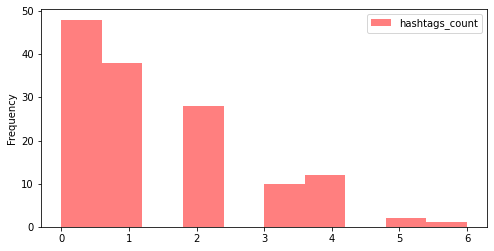

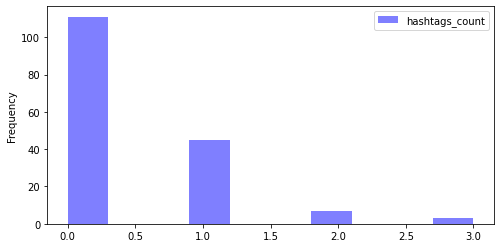

In [38]:
ax1 = hashtags_JL1.plot.hist(alpha=0.5, figsize=(8,4), fontsize=10, color='red')
ax2 = hashtags_SM1.plot.hist(alpha=0.5, figsize=(8,4), fontsize=10, color='blue')

In [39]:
hashtags_JL = df[df['user'] == 'Julian Hill MP'].groupby(['hashtags_count']).size().reset_index(name ='JulianHill')
hashtags_JL

,hashtags_count,JulianHill
0,0,48
1,1,38
2,2,28
3,3,10
4,4,12
5,5,2
6,6,1


In [40]:
hashtags_SM = df[df['user'] == 'Scott Morrison'].groupby(['hashtags_count']).size().reset_index(name ='ScottMorrison')
hashtags_SM

,hashtags_count,ScottMorrison
0,0,111
1,1,45
2,2,7
3,3,3


In [41]:
ht_merged = pd.merge(hashtags_JL, hashtags_SM, how="left", on=['hashtags_count'])
ht_merged['JulianHill'] = ht_merged['JulianHill'].fillna(0).astype(int)
ht_merged['ScottMorrison'] = ht_merged['ScottMorrison'].fillna(0).astype(int)
ht_merged.set_index('hashtags_count', inplace=True)
ht_merged

,JulianHill,ScottMorrison
hashtags_count,,
0,48,111
1,38,45
2,28,7
3,10,3
4,12,0
5,2,0
6,1,0


<AxesSubplot:title={'center':'The number of hashtags in tweets for the two users'}, ylabel='Frequency'>

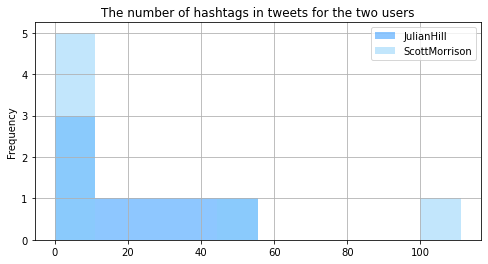

In [42]:
colors_list = ["dodgerblue", "lightskyblue"]
ht_merged.plot.hist(alpha=0.5, title='The number of hashtags in tweets for the two users', grid=True, figsize=(8,4), fontsize=10, 
        color=colors_list)

<AxesSubplot:ylabel='Frequency'>

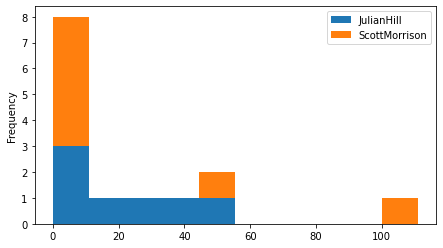

In [43]:
ht_merged[['JulianHill','ScottMorrison']].plot.hist(stacked=True, bins=10, figsize=(7.2,4))

**Task 5** Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

In [44]:
df.head()

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links,text_without_hashtags,hashtags,hashtags_count
0,1,1,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",2021-10-14 23:49:50+00:00,23,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True,"Ummm, Matty, you do know how that story ends r...",[auspol],1
1,2,2,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",2021-10-14 23:44:18+00:00,23,"@mattjcan Ummm, you do know how that story end...",[],False,"@mattjcan Ummm, you do know how that story end...",[auspol],1
2,3,3,Julian Hill MP,How many tools can you count in this photo? ht...,2021-10-14 21:54:55+00:00,21,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True,How many tools can you count in this photo?,[],0
3,4,4,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,2021-10-14 21:54:53+00:00,21,Cosplay Canavan loves the dress-up box!\n\nAn ...,[https://t.co/YTo2pXhLur],True,Cosplay Canavan loves the dress-up box!\n\nAn ...,[auspol],1
4,5,5,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,2021-10-14 21:05:16+00:00,21,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n#Doing...,"[https://t.co/VhRCoGAKkh, https://t.co/q1Gcg0O...",True,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n \n \n,"[DoingaMorrison, auspol]",2


In [45]:
print(df['full_text'][1])
print('*******************************************')
print(df['text_without_links'][1])
print('*******************************************')
print(df['text_without_hashtags'][1])

@mattjcan Ummm, you do know how that story ends right? 
#auspol
*******************************************
@mattjcan Ummm, you do know how that story ends right? 
#auspol
*******************************************
@mattjcan Ummm, you do know how that story ends right? 



In [46]:
cols = ['user', 'text_without_hashtags']
df2=df[cols]
df2

,user,text_without_hashtags
0,Julian Hill MP,"Ummm, Matty, you do know how that story ends r..."
1,Julian Hill MP,"@mattjcan Ummm, you do know how that story end..."
2,Julian Hill MP,How many tools can you count in this photo?
3,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...
4,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n \n \n
...,...,...
300,Scott Morrison,Thank you once again to the people of Victoria...
301,Scott Morrison,Had a warm discussion with Chancellor Merkel l...
302,Scott Morrison,The coming days will be difficult for many Wes...
303,Scott Morrison,Delighted to meet virtually with Malaysian PM ...


__Cleaning tweets__

Remove emails and metions

In [47]:
df2['mentions'] = df['full_text'].apply(lambda x: re.findall(r'\S*@\S*\s?', x))
df2

,user,text_without_hashtags,mentions
0,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",[]
1,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",[@mattjcan ]
2,Julian Hill MP,How many tools can you count in this photo?,[]
3,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,[]
4,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n \n \n,[]
...,...,...,...
300,Scott Morrison,Thank you once again to the people of Victoria...,[]
301,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,[]
302,Scott Morrison,The coming days will be difficult for many Wes...,[]
303,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,[@MuhyiddinYassin ]


In [48]:
#df2['email'][7]

In [49]:
#df2['mentions'] = df['full_text'].apply(lambda x: re.findall(r"@[^\s]+", x))
#df2

In [50]:
df2['text_without_mentions'] = df2['text_without_hashtags'].apply(lambda x: re.sub('\S*@\S*\s?', '',x))
df2

,user,text_without_hashtags,mentions,text_without_mentions
0,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",[],"Ummm, Matty, you do know how that story ends r..."
1,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",[@mattjcan ],"Ummm, you do know how that story ends right? \n"
2,Julian Hill MP,How many tools can you count in this photo?,[],How many tools can you count in this photo?
3,Julian Hill MP,Cosplay Canavan loves the dress-up box!\n\nAn ...,[],Cosplay Canavan loves the dress-up box!\n\nAn ...
4,Julian Hill MP,LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n \n \n,[],LOL 😂 😂 😂 \n\nThanks Urban Dictionary \n \n \n
...,...,...,...,...
300,Scott Morrison,Thank you once again to the people of Victoria...,[],Thank you once again to the people of Victoria...
301,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,[],Had a warm discussion with Chancellor Merkel l...
302,Scott Morrison,The coming days will be difficult for many Wes...,[],The coming days will be difficult for many Wes...
303,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,[@MuhyiddinYassin ],Delighted to meet virtually with Malaysian PM ...


In [51]:
#df2['text_without_mentions'][6]

In [52]:
#print(df['full_text'][6])
#print('*******************************************')
#print(df['text_without_links'][6])
#print('*******************************************')
#print(df['text_without_hashtags'][6])

In [53]:
#df2['mentions-'] = df2['text_without_hashtags'].apply(lambda x: re.findall(r"@[^\s]+", x))
#df2['mentions_count'] = df2['text_without_hashtags'].apply(lambda x: re.findall(r"@[^\s]+", x)).apply((lambda x: len(x)))
#df2

In [54]:
#df2[df2['mentions_count'] > 1].head()

In [55]:
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
df2['text_without_emoji'] = df2['text_without_mentions'].apply(lambda x: emoji_pattern.sub(r'', x))

In [56]:
df2['text_without_emoji']

0      Ummm, Matty, you do know how that story ends r...
1        Ummm, you do know how that story ends right? \n
2           How many tools can you count in this photo? 
3      Cosplay Canavan loves the dress-up box!\n\nAn ...
4           LOL    \n\nThanks Urban Dictionary \n \n \n 
                             ...                        
300    Thank you once again to the people of Victoria...
301    Had a warm discussion with Chancellor Merkel l...
302    The coming days will be difficult for many Wes...
303    Delighted to meet virtually with Malaysian PM ...
304     are closer than we have ever been. While we c...
Name: text_without_emoji, Length: 305, dtype: object

In [57]:
#print(df['full_text'][16])
#print('*******************************************')
#print(df2['text_without_mentions'][16])
#print('*******************************************')
#print(df2['text_without_mentions'][16])
#print('*******************************************')
#print(df2['text_without_emoji'][16])

In [58]:
df2['text_without_emoji'][5]

'Ummm….Matty dear, just reminding you, that you’re the Government. \n\nYou’ve been the Government for 8 years. Act like it.\n\nThis is a question for you.\n '

__Convert all words to lowercase__

In [59]:
df2['cleaned_tweets'] = df2['text_without_emoji'].apply(lambda x: re.sub(r'\w', lambda m: m.group(0).lower(),x))
df2['cleaned_tweets']

0      ummm, matty, you do know how that story ends r...
1        ummm, you do know how that story ends right? \n
2           how many tools can you count in this photo? 
3      cosplay canavan loves the dress-up box!\n\nan ...
4           lol    \n\nthanks urban dictionary \n \n \n 
                             ...                        
300    thank you once again to the people of victoria...
301    had a warm discussion with chancellor merkel l...
302    the coming days will be difficult for many wes...
303    delighted to meet virtually with malaysian pm ...
304     are closer than we have ever been. while we c...
Name: cleaned_tweets, Length: 305, dtype: object

In [60]:
import string
word_list= df2['cleaned_tweets'].apply(lambda x: re.sub('['+string.punctuation+']', '', x).split(), x)
word_list

0      [ummm, matty, you, do, know, how, that, story,...
1      [ummm, you, do, know, how, that, story, ends, ...
2      [how, many, tools, can, you, count, in, this, ...
3      [cosplay, canavan, loves, the, dressup, box, a...
4                       [lol, thanks, urban, dictionary]
                             ...                        
300    [thank, you, once, again, to, the, people, of,...
301    [had, a, warm, discussion, with, chancellor, m...
302    [the, coming, days, will, be, difficult, for, ...
303    [delighted, to, meet, virtually, with, malaysi...
304    [are, closer, than, we, have, ever, been, whil...
Name: cleaned_tweets, Length: 305, dtype: object

In [61]:
user= df2['user']
user

0      Julian Hill MP
1      Julian Hill MP
2      Julian Hill MP
3      Julian Hill MP
4      Julian Hill MP
            ...      
300    Scott Morrison
301    Scott Morrison
302    Scott Morrison
303    Scott Morrison
304    Scott Morrison
Name: user, Length: 305, dtype: object

In [62]:
#Create df from lists
cols = ['User', 'Word_list']
data = list(zip(user, word_list))

tweets = pd.DataFrame(data, columns=cols)
tweets

,User,Word_list
0,Julian Hill MP,"[ummm, matty, you, do, know, how, that, story,..."
1,Julian Hill MP,"[ummm, you, do, know, how, that, story, ends, ..."
2,Julian Hill MP,"[how, many, tools, can, you, count, in, this, ..."
3,Julian Hill MP,"[cosplay, canavan, loves, the, dressup, box, a..."
4,Julian Hill MP,"[lol, thanks, urban, dictionary]"
...,...,...
300,Scott Morrison,"[thank, you, once, again, to, the, people, of,..."
301,Scott Morrison,"[had, a, warm, discussion, with, chancellor, m..."
302,Scott Morrison,"[the, coming, days, will, be, difficult, for, ..."
303,Scott Morrison,"[delighted, to, meet, virtually, with, malaysi..."


In [63]:
tweets_JH = tweets[tweets['User']=='Julian Hill MP']
tweets_JH = tweets_JH.reset_index(drop=True)

In [64]:
JH_words=tweets_JH['Word_list']
JH_words

0      [ummm, matty, you, do, know, how, that, story,...
1      [ummm, you, do, know, how, that, story, ends, ...
2      [how, many, tools, can, you, count, in, this, ...
3      [cosplay, canavan, loves, the, dressup, box, a...
4                       [lol, thanks, urban, dictionary]
                             ...                        
134    [seriously, who, made, you, write, this, drive...
135    [“the, premiers, have, had, enough, of, scott,...
136         [totally, forgot, to, send, a, tweet, today]
137    [experiment, can, you, tweet, an, insta, let’s...
138    [dear, twitter, don’t, fall, for, more, juveni...
Name: Word_list, Length: 139, dtype: object

In [65]:
tweets_SM = tweets[tweets['User']=='Scott Morrison']
tweets_SM = tweets_SM.reset_index(drop=True)

In [66]:
SM_words=tweets_SM['Word_list']
SM_words

0      [warm, congrats, japanese, pm, kishida, great,...
1      [australia, and, india, are, great, friends, o...
2      [great, to, meet, with, australian, indian, me...
3      [great, to, meet, my, good, friend, japanese, ...
4      [excellent, discussions, at, our, first, inper...
                             ...                        
161    [thank, you, once, again, to, the, people, of,...
162    [had, a, warm, discussion, with, chancellor, m...
163    [the, coming, days, will, be, difficult, for, ...
164    [delighted, to, meet, virtually, with, malaysi...
165    [are, closer, than, we, have, ever, been, whil...
Name: Word_list, Length: 166, dtype: object

In [67]:
#for word in word_list:
#    print(word)

In [68]:
#word_list[4]

__Removing stop words with NLTK__

In [69]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

JH_wordlist = []
for tweet in JH_words:
    for w in tweet:
        if w not in stopwords.words("english"):
            JH_wordlist.append(w)
JH_wordlist

['ummm',
 'matty',
 'know',
 'story',
 'ends',
 'right',
 'ummm',
 'know',
 'story',
 'ends',
 'right',
 'many',
 'tools',
 'count',
 'photo',
 'cosplay',
 'canavan',
 'loves',
 'dressup',
 'box',
 'accountant',
 'trade',
 'likes',
 'pretend',
 'hes',
 'miner',
 'workers',
 'regional',
 'australia',
 'screwed',
 'lnp',
 'government',
 'lol',
 'thanks',
 'urban',
 'dictionary',
 'ummm…matty',
 'dear',
 'reminding',
 'you’re',
 'government',
 'you’ve',
 'government',
 '8',
 'years',
 'act',
 'like',
 'question',
 'last',
 'time',
 'happened',
 'liberal',
 'senator',
 'amanda',
 'stoker',
 'agreed',
 'wasn’t',
 'good',
 'look',
 'member',
 'resigned',
 'aat',
 'speak',
 'today',
 'bloke',
 'quit',
 'stinks',
 'lobbyists',
 'members',
 'aat',
 'morrison',
 'stacking',
 'aat',
 'using',
 'lucrative',
 'jobs',
 'scheme',
 'liberal',
 'party',
 'hacks',
 'amp',
 'failed',
 'mps',
 'impotent',
 'government',
 'talking',
 'going',
 'moon',
 'amp',
 'collecting',
 'lunar',
 'soil',
 'science',
 

In [70]:
SM_wordlist = []
for tweet in SM_words:
    for w in tweet:
        if w not in stopwords.words("english"):
            SM_wordlist.append(w)
SM_wordlist

['warm',
 'congrats',
 'japanese',
 'pm',
 'kishida',
 'great',
 'chat',
 'special',
 'strategic',
 'partnership',
 'efforts',
 'secure',
 'prosperous',
 'indopacific',
 'well',
 'strengthen',
 'defence',
 'security',
 'amp',
 'economic',
 'ties',
 'incl',
 'secure',
 'supply',
 'chains',
 'clean',
 'energy',
 'amp',
 'working',
 'partners',
 'quad',
 'australia',
 'india',
 'great',
 'friends',
 'comprehensive',
 'strategic',
 'partnership',
 'continues',
 'go',
 'strength',
 'strength',
 'new',
 'low',
 'emissions',
 'technology',
 'partnership',
 'see',
 'us',
 'combine',
 'efforts',
 'hydrogen',
 'ultralow',
 'cost',
 'solar',
 'reduce',
 'carbon',
 'emissions',
 'great',
 'meet',
 'australian',
 'indian',
 'media',
 'today',
 'update',
 'initiatives',
 'discussed',
 'pm',
 'last',
 'week',
 'deepening',
 'trade',
 'investment',
 'ties',
 'commitment',
 'open',
 'secure',
 'resilient',
 'indopacific',
 'critical',
 'emerging',
 'technologies',
 'great',
 'meet',
 'good',
 'friend',

In [71]:
from collections import Counter
counts_JH = Counter(JH_wordlist)
#print(counts_JH)
counts_JH1 = pd.DataFrame.from_dict(counts_JH, orient='index').reset_index()
counts_JH1 = counts_JH1.rename(columns={'index':'word', 0:'freq'})
counts_JH1['user'] = 'Julian Hill MP'
counts_JH1['SM_total'] = counts_JH1['freq'].sum()
print('Total JH words:',counts_JH1['freq'].sum())
sorted_JH = counts_JH1.sort_values(by=['freq'], ascending = [False])[:20]
sorted_JH

Total JH words: 1763


,word,freq,user,SM_total
70,amp,42,Julian Hill MP,1763
62,morrison,41,Julian Hill MP,1763
126,scott,30,Julian Hill MP,1763
104,morrison’s,14,Julian Hill MP,1763
143,vaccines,14,Julian Hill MP,1763
116,get,13,Julian Hill MP,1763
26,government,12,Julian Hill MP,1763
122,it’s,12,Julian Hill MP,1763
252,lockdowns,11,Julian Hill MP,1763
251,end,10,Julian Hill MP,1763


In [72]:
counts_SM = Counter(SM_wordlist)
#print(counts_SM)
counts_SM1 = pd.DataFrame.from_dict(counts_SM, orient='index').reset_index()
counts_SM1 = counts_SM1.rename(columns={'index':'word', 0:'freq'})
counts_SM1['user'] = 'Scott Morrison'
counts_SM1['SM_total'] = counts_SM1['freq'].sum()
print('Total SM words:',counts_SM1['freq'].sum())
sorted_SM = counts_SM1.sort_values(by=['freq'], ascending = [False])[:20]
sorted_SM

Total SM words: 3534


,word,freq,user,SM_total
29,australia,66,Scott Morrison,3534
18,amp,63,Scott Morrison,3534
94,australians,33,Scott Morrison,3534
53,today,32,Scott Morrison,3534
5,great,30,Scott Morrison,3534
36,new,27,Scott Morrison,3534
81,first,23,Scott Morrison,3534
3,pm,22,Scott Morrison,3534
114,get,22,Scott Morrison,3534
137,vaccine,22,Scott Morrison,3534


In [87]:
top20_outer = pd.merge(sorted_JH, sorted_SM, on='word', how='outer')
top20_outer

,word,freq_x,user_x,SM_total_x,freq_y,user_y,SM_total_y
0,amp,42.0,Julian Hill MP,1763.0,63.0,Scott Morrison,3534.0
1,morrison,41.0,Julian Hill MP,1763.0,NaN,NaN,NaN
2,scott,30.0,Julian Hill MP,1763.0,NaN,NaN,NaN
3,morrison’s,14.0,Julian Hill MP,1763.0,NaN,NaN,NaN
4,vaccines,14.0,Julian Hill MP,1763.0,NaN,NaN,NaN
5,get,13.0,Julian Hill MP,1763.0,22.0,Scott Morrison,3534.0
6,government,12.0,Julian Hill MP,1763.0,NaN,NaN,NaN
7,it’s,12.0,Julian Hill MP,1763.0,NaN,NaN,NaN
8,lockdowns,11.0,Julian Hill MP,1763.0,NaN,NaN,NaN
9,end,10.0,Julian Hill MP,1763.0,NaN,NaN,NaN


In [93]:
top20_outer['freq_x'] = top20_outer['freq_x'].fillna(0)
top20_outer['freq_y'] = top20_outer['freq_y'].fillna(0)
top20_outer.fillna(method='ffill', inplace=True)
top20_outer

,word,freq_x,user_x,SM_total_x,freq_y,user_y,SM_total_y
0,amp,42.0,Julian Hill MP,1763.0,63.0,Scott Morrison,3534.0
1,morrison,41.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0
2,scott,30.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0
3,morrison’s,14.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0
4,vaccines,14.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0
5,get,13.0,Julian Hill MP,1763.0,22.0,Scott Morrison,3534.0
6,government,12.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0
7,it’s,12.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0
8,lockdowns,11.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0
9,end,10.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0


In [99]:
top20_outer['ratio_JH'] = top20_outer['freq_x']+1/top20_outer['SM_total_x']+1
top20_outer['ratio_SM'] = top20_outer['freq_y']+1/top20_outer['SM_total_y']+1
top20_outer['odds_ratio'] = top20_outer['ratio_JH']/top20_outer['ratio_SM']
top20_outer['log'] = np.log2(top20_outer['odds_ratio'])

top20_outer

,word,freq_x,user_x,SM_total_x,freq_y,user_y,SM_total_y,ratio_JH,ratio_SM,odds_ratio,log
0,amp,42.0,Julian Hill MP,1763.0,63.0,Scott Morrison,3534.0,43.000567,64.000283,0.671881,-0.573723
1,morrison,41.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,42.000567,1.000283,41.988686,5.391929
2,scott,30.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,31.000567,1.000283,30.991798,4.953815
3,morrison’s,14.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,15.000567,1.000283,14.996324,3.906537
4,vaccines,14.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,15.000567,1.000283,14.996324,3.906537
5,get,13.0,Julian Hill MP,1763.0,22.0,Scott Morrison,3534.0,14.000567,23.000283,0.608713,-0.716166
6,government,12.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,13.000567,1.000283,12.996890,3.700094
7,it’s,12.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,13.000567,1.000283,12.996890,3.700094
8,lockdowns,11.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,12.000567,1.000283,11.997172,3.584623
9,end,10.0,Julian Hill MP,1763.0,0.0,Scott Morrison,3534.0,11.000567,1.000283,10.997455,3.459098


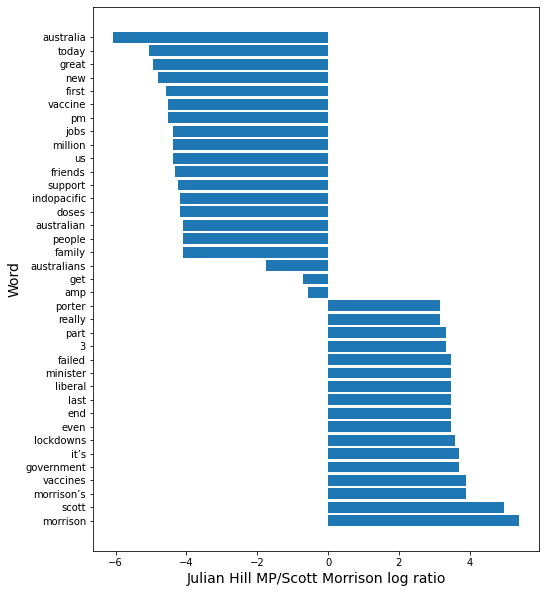

In [112]:
cols = ['word', 'log']
results_df = top20_outer[cols]

new_index = results_df.log.sort_values(ascending = False).index
sorted_results = results_df.reindex(new_index)
filtered_results = sorted_results[np.abs(sorted_results.log) > 0]

plt.figure(figsize =(8,10))
plt.barh(filtered_results.word, filtered_results.log)
plt.xlabel('Julian Hill MP/Scott Morrison log ratio', fontsize = 14)
plt.ylabel('Word', fontsize = 14)
plt.show()

In [88]:
#top20 = pd.concat([sorted_JH, sorted_SM], axis=0, ignore_index=True)
#top20

In [85]:
#top20['word'].value_counts()
top20.groupby('word')['user'].count()

word
3              1
amp            2
australia      1
australian     1
australians    2
doses          1
end            1
even           1
failed         1
family         1
first          1
friends        1
get            2
government     1
great          1
indopacific    1
it’s           1
jobs           1
last           1
liberal        1
lockdowns      1
million        1
minister       1
morrison       1
morrison’s     1
new            1
part           1
people         1
pm             1
porter         1
really         1
scott          1
support        1
today          1
us             1
vaccine        1
vaccines       1
Name: user, dtype: int64

#https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

In [74]:
#mona

In [75]:
cols = ['user', 'cleaned_tweets']
df3 = df2[cols]
df3 = df3.rename(columns={'user': 'speaker', 'cleaned_tweets': 'tweets'})
df3

,speaker,tweets
0,Julian Hill MP,"ummm, matty, you do know how that story ends r..."
1,Julian Hill MP,"ummm, you do know how that story ends right? \n"
2,Julian Hill MP,how many tools can you count in this photo?
3,Julian Hill MP,cosplay canavan loves the dress-up box!\n\nan ...
4,Julian Hill MP,lol \n\nthanks urban dictionary \n \n \n
...,...,...
300,Scott Morrison,thank you once again to the people of victoria...
301,Scott Morrison,had a warm discussion with chancellor merkel l...
302,Scott Morrison,the coming days will be difficult for many wes...
303,Scott Morrison,delighted to meet virtually with malaysian pm ...


In [76]:
# create a list of candidates
speakers = df3.speaker.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(df3[(df3.speaker==candidate)].tweets.tolist()) for candidate in speakers]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer(stop_words='english', ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=speakers

In [77]:
cv

CountVectorizer(ngram_range=(1, 3), stop_words='english')

In [78]:
corpus

["ummm, matty, you do know how that story ends right? \n  ummm, you do know how that story ends right? \n how many tools can you count in this photo?  cosplay canavan loves the dress-up box!\n\nan accountant by trade, he likes to pretend he's a miner.\n\nwhile workers in regional australia are screwed over by his lnp government.\n  lol    \n\nthanks urban dictionary \n \n \n  ummm….matty dear, just reminding you, that you’re the government. \n\nyou’ve been the government for 8 years. act like it.\n\nthis is a question for you.\n     last time this happened, liberal senator amanda stoker agreed it wasn’t a good look, and the member resigned from the aat.\n\nwill she speak up today? will this bloke quit now?  this stinks. lobbyists should not be members of the aat.\n\nmorrison is stacking out the aat, using it as a lucrative jobs scheme for liberal party hacks &amp; failed mps.\n \n  this impotent government is talking about going to the moon &amp; collecting lunar soil for a science.\n\

In [79]:
X 

array([[ 2,  0,  0, ...,  0,  0,  0],
       [13,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [80]:
bow

,000,000 50m,000 50m 30,000 australian,000 australian manufactured,000 australians,000 australians getting,000 businesses,000 businesses 3m,000 disaster,...,गणत वस भक,भक,भक मन,भक मन australia,मन,मन australia,मन australia stands,वस,वस भक,वस भक मन
Julian Hill MP,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scott Morrison,13,1,1,1,1,1,1,1,1,2,...,1,2,2,1,2,1,1,1,1,1


In [81]:
from tqdm import tqdm #used for progress bar
import math

#build an empty dataframe
t_bow_df=pd.DataFrame()

# By candidate, divide the number of times a word is said, 
# by the total number of times they've said all the words that they have said (frequency)
bow_transformed = bow.apply(lambda x: (x+1)/ (bow.loc[x.name].sum()+1), axis=1) 

for candidate in tqdm(speakers):
    feat_s = bow[bow.index != candidate].sum()+1 #sum all the times each word was said excluding the candidate
    feat_s_all = np.sum(bow[bow.index != candidate].sum()) # all the total words that were said, excluding the candidate
    tot = feat_s / feat_s_all #find the frequency of words said among other candidates
    row = bow_transformed.loc[candidate] / tot #divide the candidate's array of frequency of words by all other candidates' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
    
    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[candidate])]) #append to df

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.23it/s]


In [82]:
t_bow_df

,000,000 50m,000 50m 30,000 australian,000 australian manufactured,000 australians,000 australians getting,000 businesses,000 businesses 3m,000 disaster,...,गणत वस भक,भक,भक मन,भक मन australia,मन,मन australia,मन australia stands,वस,वस भक,वस भक मन
Julian Hill MP,-1.149962,0.072430,0.072430,0.072430,0.072430,0.072430,0.072430,0.072430,0.072430,-0.512532,...,0.072430,-0.512532,-0.512532,0.072430,-0.512532,0.072430,0.072430,0.072430,0.072430,0.072430
Scott Morrison,1.149504,-0.072889,-0.072889,-0.072889,-0.072889,-0.072889,-0.072889,-0.072889,-0.072889,0.512074,...,-0.072889,0.512074,0.512074,-0.072889,0.512074,-0.072889,-0.072889,-0.072889,-0.072889,-0.072889


__log odds ratio__
Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

android_iphone_ratios <- tweet_words %>% 

  count(word, source) %>%
  filter(sum(n) >= 5) %>%
  spread(source, n, fill = 0) %>%
  ungroup() %>%
  mutate_each(funs((. + 1) / sum(. + 1)), -word) %>%
  mutate(logratio = log2(Android / iPhone)) %>%
  arrange(desc(logratio))

In [83]:
texts = []
for each_tweet in word_l:
    text = each_tweet
    print(text)
    lowercase = text.lower()
    print(lowercase)
    texts.append(lowercase)
tweet_words = []
for text in texts:
    words = re.findall('[^\W\d_]+', text)
    words = [w for w in words if len(w) > 1]
    tweet_words.append(words)
return tweet_words

NameError: name 'word_l' is not defined

In [ ]:
df.dtypes

**Task 6** Use the vaderSentiment module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
            ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

In [ ]:
#vadertext

In [ ]:
cols = ['user','text_without_mentions']
df4 = df2[cols]
df4 = df4.rename(columns={'text_without_mentions': 'vadertext'})
df4

In [ ]:
valence_score = []
compound = []
analyzer = SentimentIntensityAnalyzer()
for sentence in df4['vadertext']:
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs))) 
    #print("{:-<65} {}".format(sentence, str(vs['compound']))) 
    valence_score.append(vs)
    compound.append(vs['compound'])
df4['valence_score'] = valence_score
df4['compound'] = compound

In [ ]:
df4

In [ ]:
#the average 'compound' sentiment for all their tweets
df4.groupby('user')['compound'].mean()